In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.applications.inception_v3 import  preprocess_input as inception_preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import  preprocess_input as vgg_preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout,add
from tensorflow.keras.models import load_model
from tqdm import tqdm

In [2]:
VOCAB_SIZE = 22217
MAX_LENGTH = 39


In [3]:
# read tokenizer
tokenizer = pickle.load(open('tokenizer_ar.pkl', 'rb'))

In [4]:
# read model vgg16 -> model_ar.h5
vgg16_model = load_model('model_ar.h5')
# read model inception -> model_inception_ar.h5
inception_model = load_model('model_inception_ar.h5')


In [7]:
# load actual vgg and inception model
vgg16 = VGG16()
inception = InceptionV3()
# remove last layer
vgg16 = Model(inputs=vgg16.inputs, outputs=vgg16.layers[-2].output)
inception = Model(inputs=inception.inputs, outputs=inception.layers[-2].output)

96112376/96112376 [==============================] - 104s 1us/step


In [8]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [9]:
# generate caption for an image
def predict_caption(model, image_features, tokenizer, max_length):
    # add start tag for generation process
    in_text = '<start>'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image_features, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'end':
            # remove the last word
            in_text = in_text.split()
            in_text = in_text[:-1]
            in_text = " ".join(in_text)
            in_text += " <end>"
            break
    
    return in_text

In [10]:
from matplotlib import pyplot as plt
def predict_new_image_vgg(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = vgg_preprocess_input(image)
    image_features = vgg16.predict(image)
    plt
    return (predict_caption(vgg16_model, image_features, tokenizer, MAX_LENGTH))


def predict_new_image_inception(image_path):
    image = load_img(image_path, target_size=(299, 299))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = inception_preprocess_input(image)
    image_features = inception.predict(image)
    return (predict_caption(inception_model, image_features, tokenizer, MAX_LENGTH))
    
def predict_for_both(image_path):
    image= load_img(image_path)
    plt.imshow(image)
    vgg = predict_new_image_vgg(image_path)
    inception = predict_new_image_inception(image_path)
    print("VGG16: ", vgg)
    print("Inception: ", inception)


2023-06-07 09:19:27.804609: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 506ms/step
VGG16:  <start> رست الطائرات على المدرج في يوم غائم <end>
Inception:  <start> طائرة ركاب كبيرة تجلس على المدرج <end>


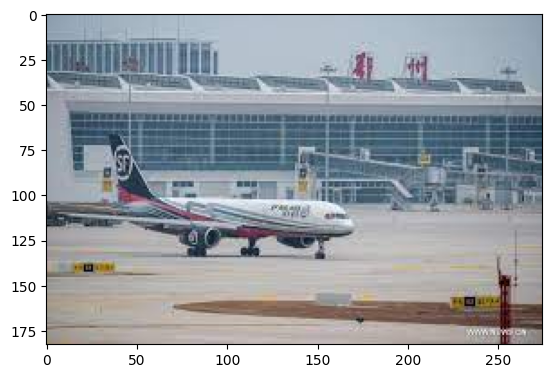

In [11]:
predict_for_both('testing/1.jpg')

1/1 [==============================] - 0s 25ms/step
VGG16:  <start> تتفتح باقات من الموز الأخضر في الخلفية <end>
Inception:  <start> عرض إنتاج للموز والفطائر المختلفة <end>


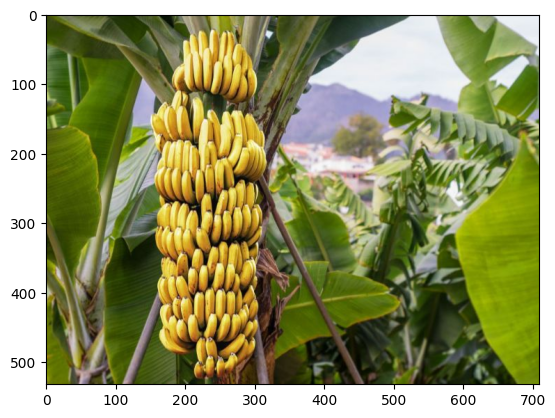

In [11]:
predict_for_both('testing/2.jpg')

1/1 [==============================] - 0s 20ms/step
VGG16:  <start> كلب بني وأسود يقف في حقل <end>
Inception:  <start> رجل يحمل جهاز تحكم عن بعد وي في غرفة المعيشة <end>


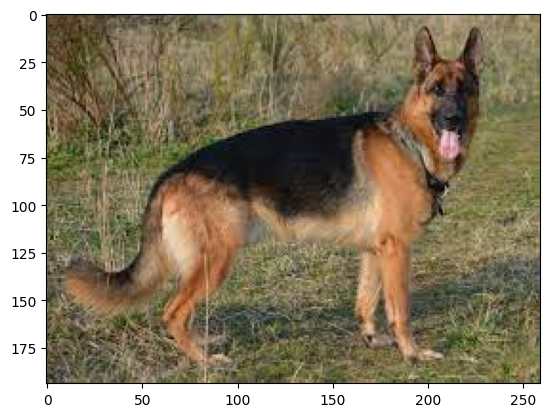

In [12]:
predict_for_both('testing/3.jpg')

1/1 [==============================] - 0s 25ms/step
VGG16:  <start> صورة مقرّبة لفرشاة أسنان زرقاء وبيضاء <end>
Inception:  <start> قطة تجلس على طاولة عليها كمبيوتر محمول <end>


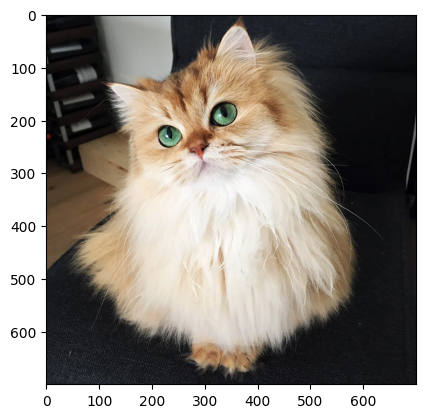

In [13]:
predict_for_both('testing/4.jpg')

1/1 [==============================] - 0s 77ms/step
VGG16:  <start> امرأة ترتدي قميصًا ورديًا تغسل أسنانها في غرفة أبيض <end>
Inception:  <start> امرأة تحمل جهاز تحكم لعبة نينتندو وي <end>


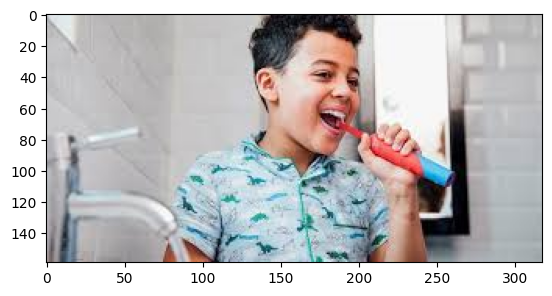

In [12]:
predict_for_both('testing/5.jpg')

1/1 [==============================] - 0s 21ms/step
VGG16:  <start> بيتزا صغيرة على طبق أبيض <end>
Inception:  <start> بيتزا شخصية تجلس على طبق أبيض <end>


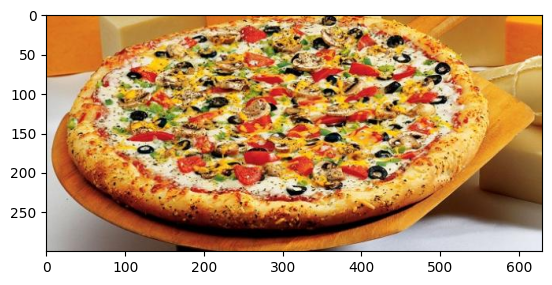

In [15]:
predict_for_both('testing/6.jpg')

1/1 [==============================] - 0s 21ms/step
VGG16:  <start> هوت دوج مع الخردل المذاق والمايونيز <end>
Inception:  <start> هوت دوج مع ماك الخردل والخردل <end>


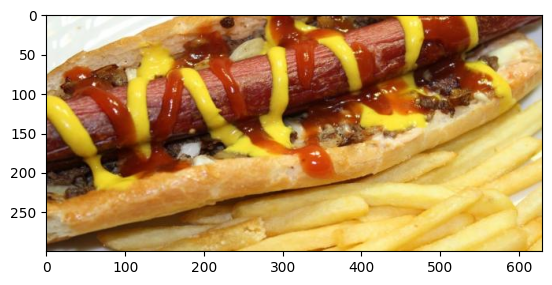

In [16]:
predict_for_both('testing/7.jpg')

1/1 [==============================] - 0s 20ms/step
VGG16:  <start> العديد من السيارات متوقفة في شارع المدينة <end>
Inception:  <start> هناك علامة توقف في أحد شوارع المدينة <end>


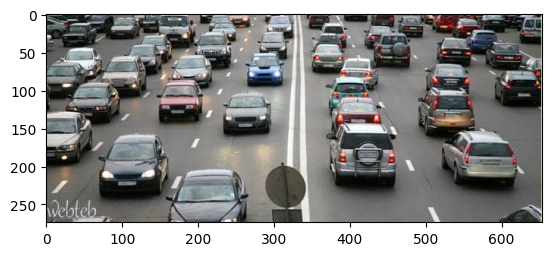

In [17]:
predict_for_both('testing/8.jpg')

1/1 [==============================] - 0s 20ms/step
VGG16:  <start> رجل يحمل جهاز تحكم عن بعد <end>
Inception:  <start> رجل يحمل جهاز تحكم عن بعد في لعبة فيديو <end>


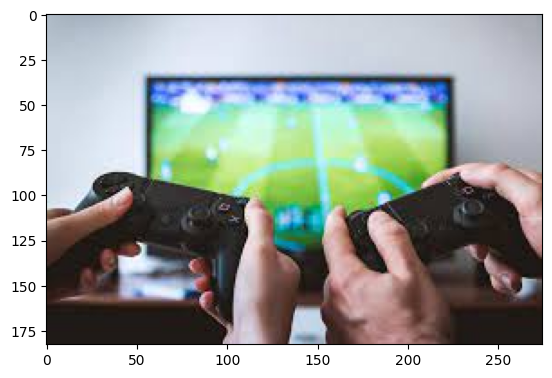

In [18]:
predict_for_both('testing/9.jpg')

1/1 [==============================] - 0s 22ms/step
VGG16:  <start> الفيل جذعًا في الماء في الماء <end>
Inception:  <start> الفيل الصغير يقف على سياج <end>


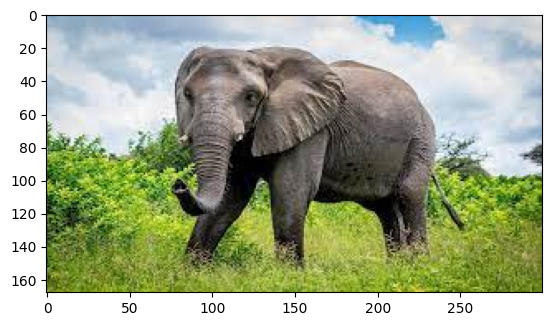

In [19]:
predict_for_both('testing/10.jpg')